In [16]:
import import_ipynb

from nnd import *

from scipy import optimize


In [17]:
X

array([[0.3, 1. ],
       [0.5, 0.2],
       [1. , 0.4]])

In [18]:
class trainer(object):
    def __init__(self, N):
        # Make Local reference to network:
        self.N = N
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))

    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X, y)

        return cost, grad
    
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        # Make empty list to store costs:
        self.J = []

        params0= self.N.getParams()

        options = {'maxiter':200, 'disp':True,}
        _res = optimize.minimize(self.costFunctionWrapper, \
                                 params0, \
                                 jac=True,  \
                                 method='BFGS', args=(X,y), \
                                 options=options, \
                                 callback=self.callbackF)
        
        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [19]:
NN = Neural_Network()
T= trainer(NN)
T.train(X, y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 39
         Function evaluations: 41
         Gradient evaluations: 41


Text(0, 0.5, 'Cost')

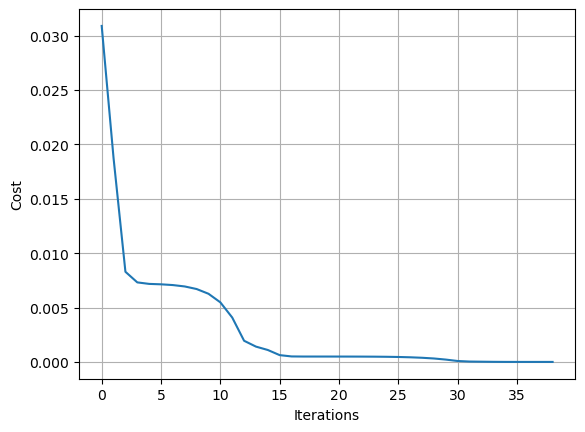

In [20]:
plt.plot(T.J)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [21]:
NN.costFunctionPrime(X,y)

(array([[ 1.06662573e-06, -7.14729600e-07, -7.23846476e-08],
        [ 1.06806503e-06, -6.17719821e-07, -6.95889798e-08]]),
 array([[-7.96949411e-07],
        [-2.51645942e-06],
        [-2.41557386e-06]]))

In [22]:
NN.forward(X)

array([[0.74999576],
       [0.81998604],
       [0.92999507]])

In [23]:
y

array([[0.75],
       [0.82],
       [0.93]])

In [24]:
#Test network for various combinations of sleep/study:
hoursSleep = np.linspace(0, 10, 100)
hoursStudy = np.linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = np.meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [25]:
allOutputs = NN.forward(allInputs)

In [26]:
a = np.arange(6)
a.reshape(3,2)


array([[0, 1],
       [2, 3],
       [4, 5]])

Text(0, 0.5, 'Hours Study')

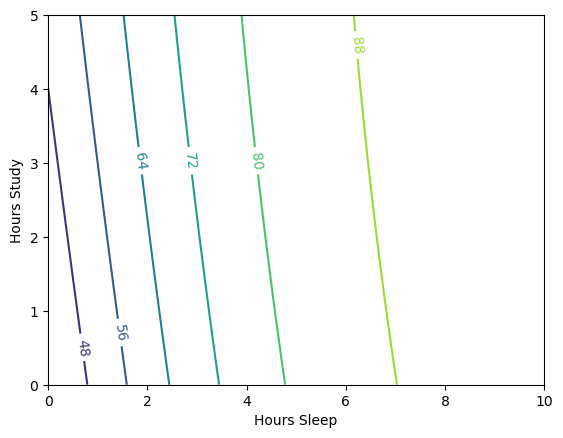

In [27]:
#Contour Plot:

yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Hours Sleep')
plt.ylabel('Hours Study')

Text(0.5, 0, 'Test Score')

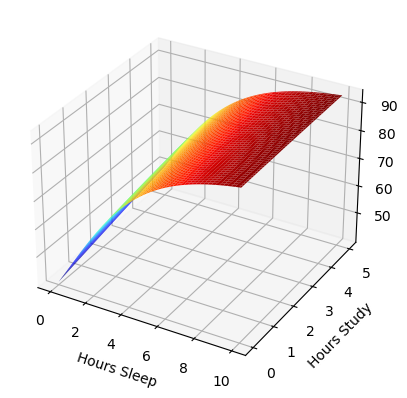

In [28]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
%matplotlib inline

# from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet)

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')